In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('final.txt', sep=' ', header=None)
data.columns = ['x', 'y', 'w', 's', 'u', 'v']
data.sort_values(by=['x', 'y'], inplace=True)
Nx = 201
Ny = 201
print(data.head())
print(data.shape)
data = data.iloc[0:Nx*Ny, :]

     x      y         w    s    u    v
0  0.0  0.000  0.000000  0.0  0.0  0.0
1  0.0  0.005 -0.000615  0.0  0.0  0.0
2  0.0  0.010 -0.001536  0.0  0.0  0.0
3  0.0  0.015 -0.002122  0.0  0.0  0.0
4  0.0  0.020 -0.002042  0.0  0.0  0.0
(40401, 6)


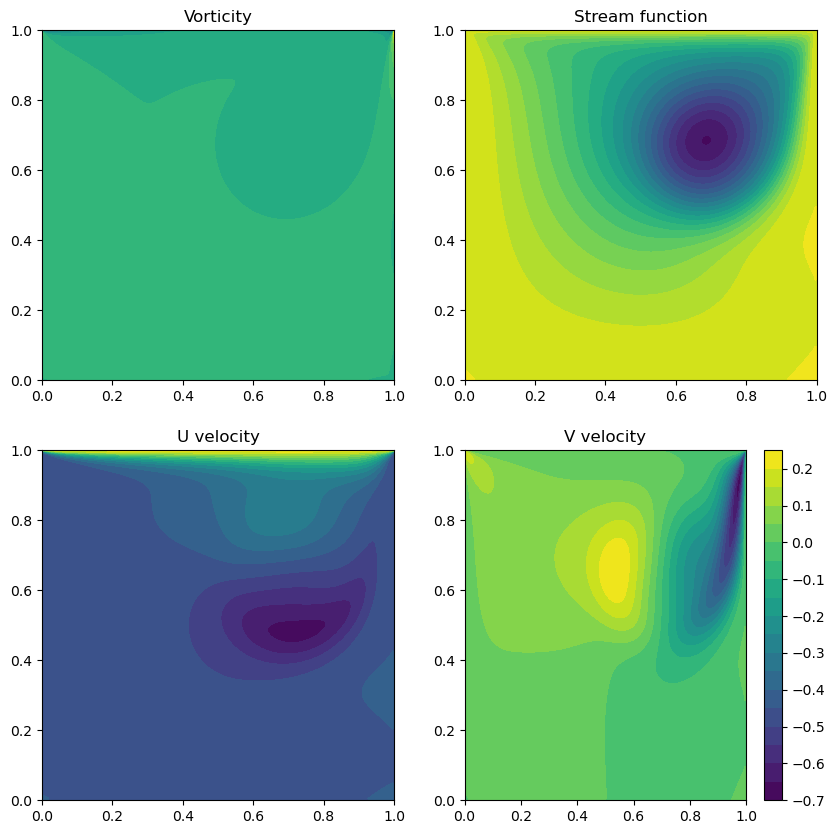

In [3]:
X = data['x'].values.reshape(Nx, Ny)
Y = data['y'].values.reshape(Nx, Ny)
W = data['w'].values.reshape(Nx, Ny)
S = data['s'].values.reshape(Nx, Ny)
U = data['u'].values.reshape(Nx, Ny)
V = data['v'].values.reshape(Nx, Ny)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.contourf(X, Y, W, 20, cmap='viridis')
plt.title('Vorticity')
plt.subplot(2, 2, 2)
plt.contourf(X, Y, S, 20, cmap='viridis')
plt.title('Stream function')
plt.subplot(2, 2, 3)
plt.contourf(X, Y, U, 20, cmap='viridis')
plt.title('U velocity')
plt.subplot(2, 2, 4)
plt.contourf(X, Y, V, 20, cmap='viridis')
plt.title('V velocity')
plt.colorbar()
plt.show()

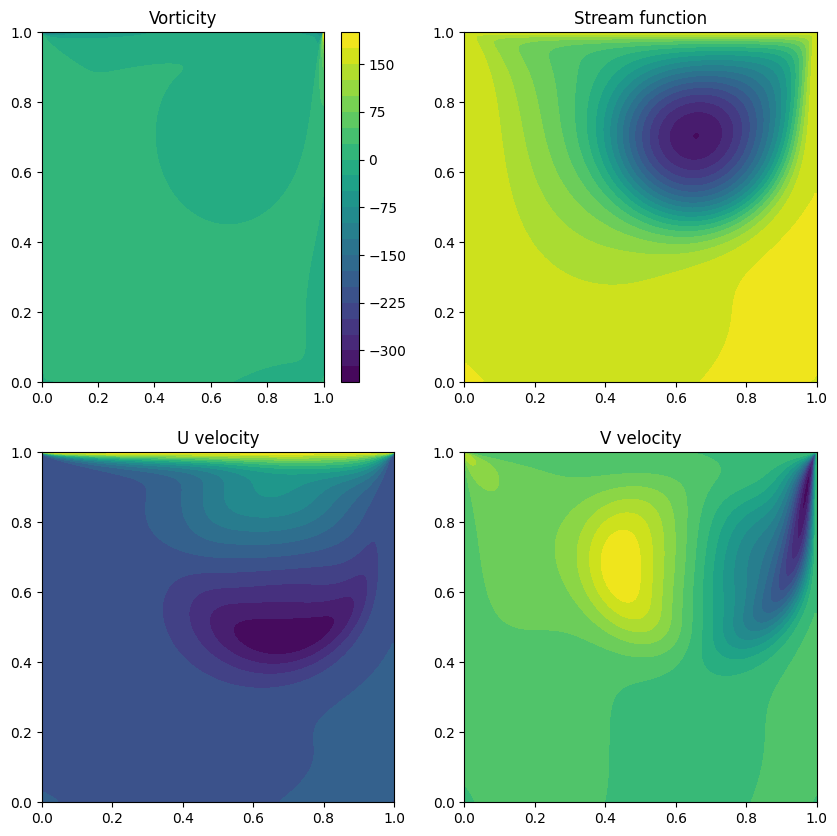

In [19]:
X = data['x'].values.reshape(Nx, Ny)
Y = data['y'].values.reshape(Nx, Ny)
W = data['w'].values.reshape(Nx, Ny)
S = data['s'].values.reshape(Nx, Ny)
U = data['u'].values.reshape(Nx, Ny)
V = data['v'].values.reshape(Nx, Ny)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.contourf(X, Y, W, 20, cmap='viridis')
plt.title('Vorticity')
plt.subplot(2, 2, 2)
plt.contourf(X, Y, S, 20, cmap='viridis')
plt.title('Stream function')
plt.subplot(2, 2, 3)
plt.contourf(X, Y, U, 20, cmap='viridis')
plt.title('U velocity')
plt.subplot(2, 2, 4)
plt.contourf(X, Y, V, 20, cmap='viridis')
plt.title('V velocity')
plt.show()